In [25]:
# import library 

library(lubridate)
library(GGally)
library(ggplot2)
#library(hydroGOF)
library(mvtnorm)


In [24]:
# installing to /Users/yennanliu/anaconda3/envs/python_R/lib/R/library/utf8/libs
#install.packages("ggplot2")
#install.packages("lubridate")
#install.packages("GGally")
#install.packages("mvtnorm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
# load the data 
House <- read.csv(file="/Users/yennanliu/analysis/project/rev/Analytics/kc_house_data.csv",head=TRUE,sep=",")

In [33]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [26]:
# data preprocess 
House$date<-(substr(House$date, 1, 8))
House$date<- ymd(House$date)
House$date<-as.numeric(as.Date(House$date, origin = "1900-01-01"))


In [30]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,16356,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,16413,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,16491,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [34]:
# Splitting the Data Set 
ratio = sample(1:nrow(House), size = 0.25*nrow(House))
Test = House[ratio,] #Test dataset 25% of total
Training = House[-ratio,] #Train dataset 75% of total


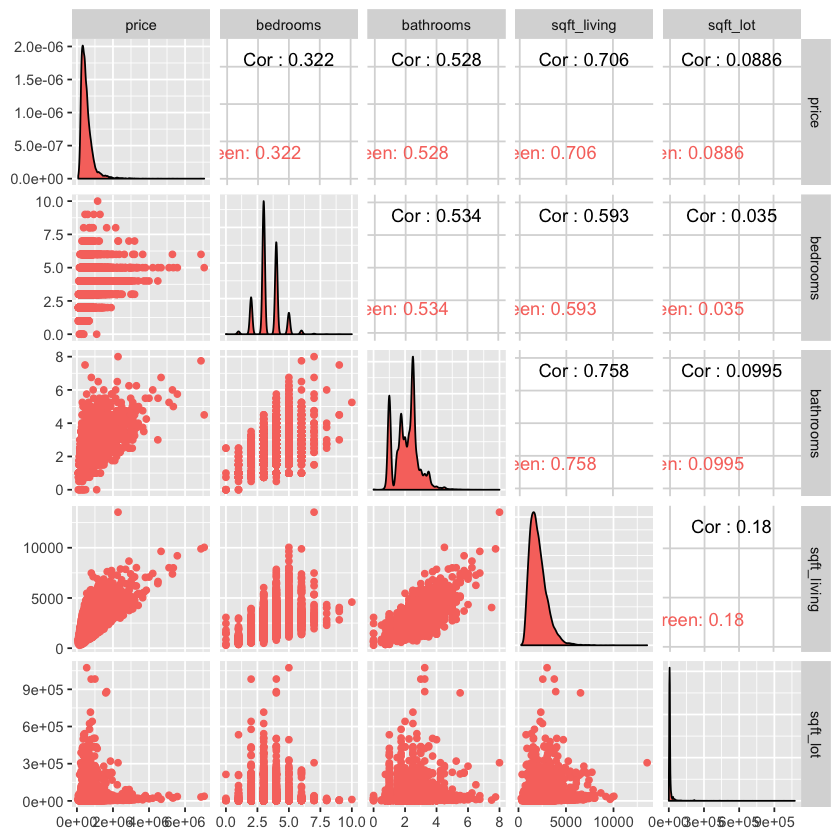

In [37]:
# visualize 1 

## Checking Relationship between price, bedrooms, bathrooms, sqft_living and sqft lot
plot1<-ggpairs(data=Training, columns=3:7,
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot1

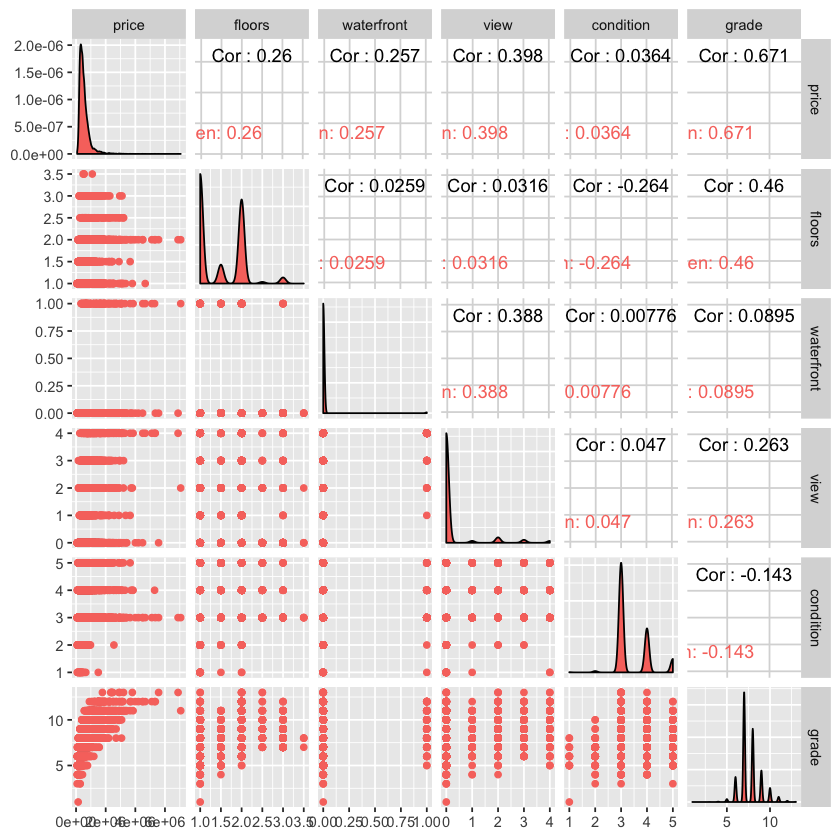

In [39]:
# visualize 2

## Checking Relationship between price, floors, waterfront, view, condition and grade
plot2<-ggpairs(data=Training, columns=c(3,8:12),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot2


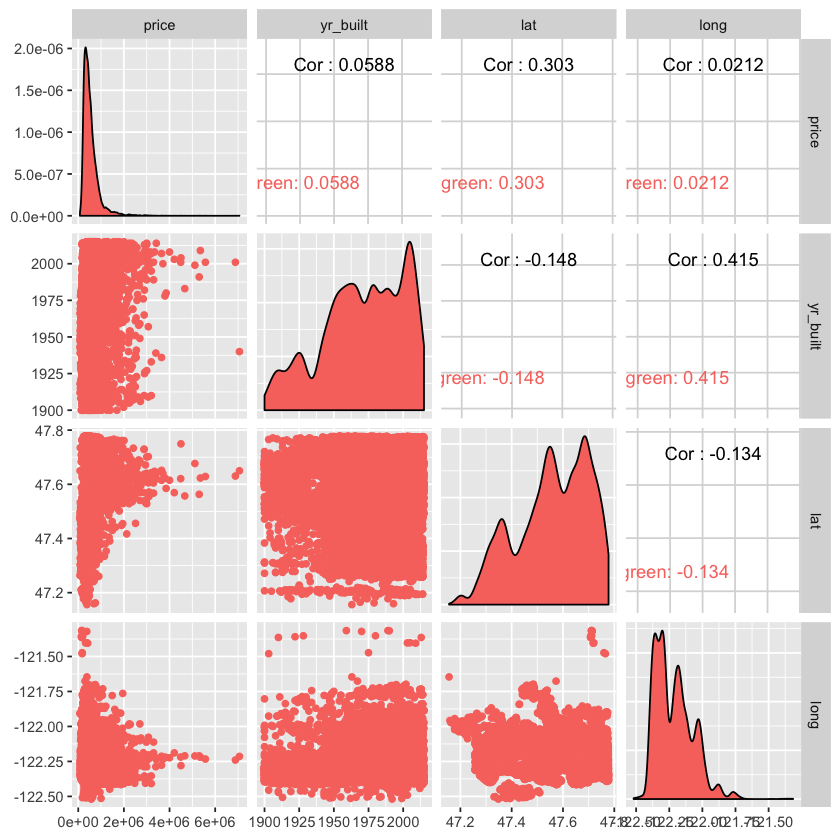

In [40]:
# visualize 3 

## Checking Relationship between price, yr built, lat and long
plot3=ggpairs(data=Training, columns=c(3,15,18,19),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot3

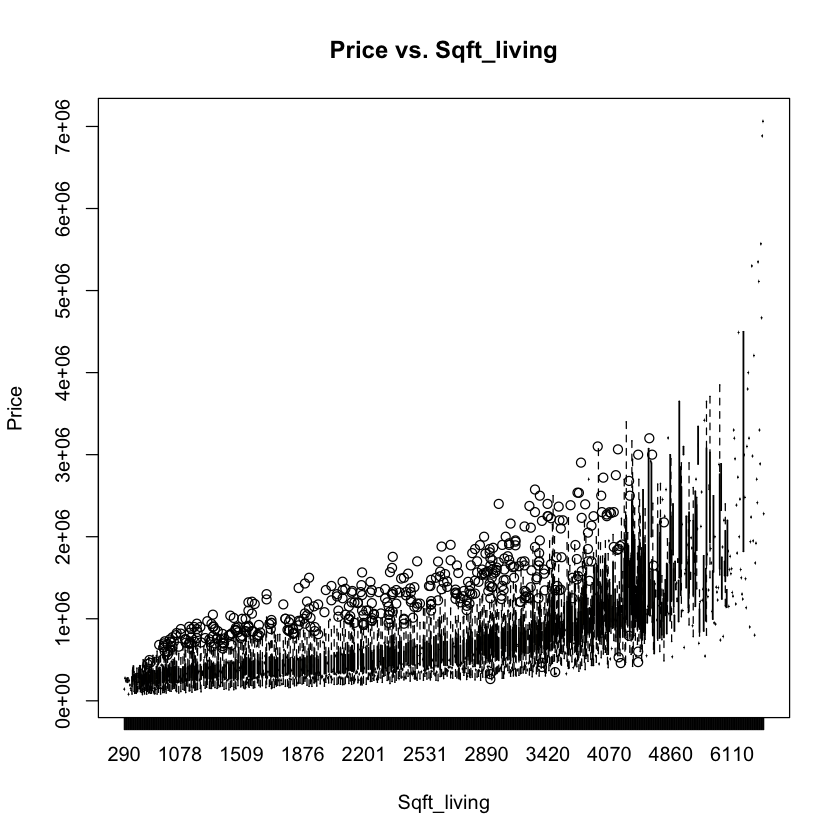

In [41]:
# boxplot 1 

## Price vs. Sqft_living ->> Nice correlation, as sqft increases, price increases as well.
boxplot1=boxplot(price~sqft_living, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Sqft_living", xlab="Sqft_living", ylab="Price")


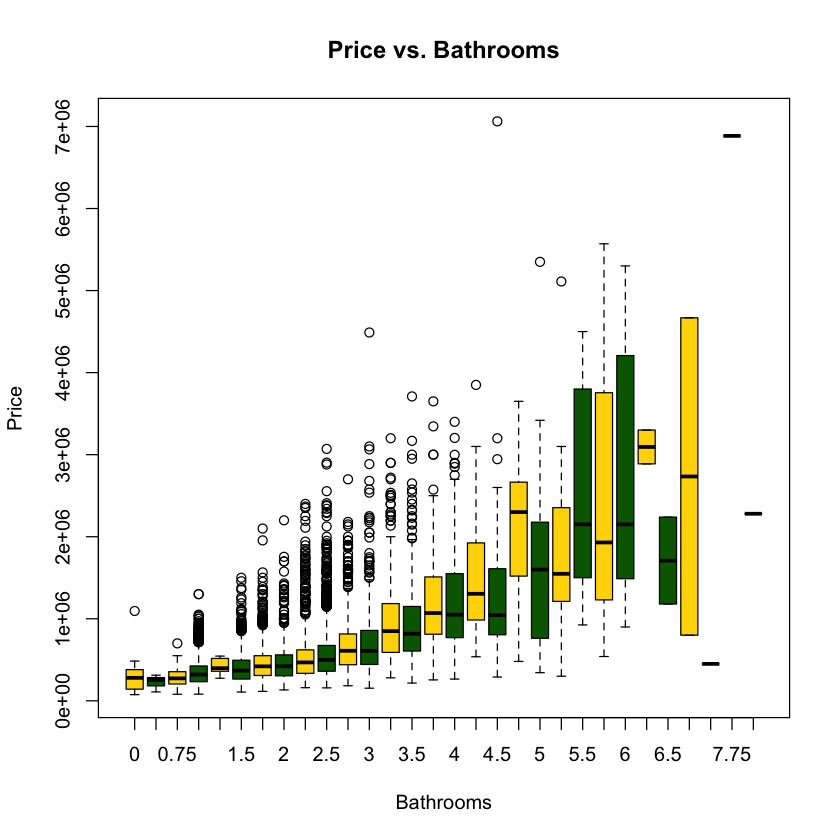

In [42]:
# boxplot 2 


## Price vs. Bathrooms ->> Nice correlation, as # of bahtrooms increases [median of bar plot], price increases as well, with one expection in when bathroom=7
boxplot2=boxplot(price~bathrooms, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Bathrooms", xlab="Bathrooms", ylab="Price")


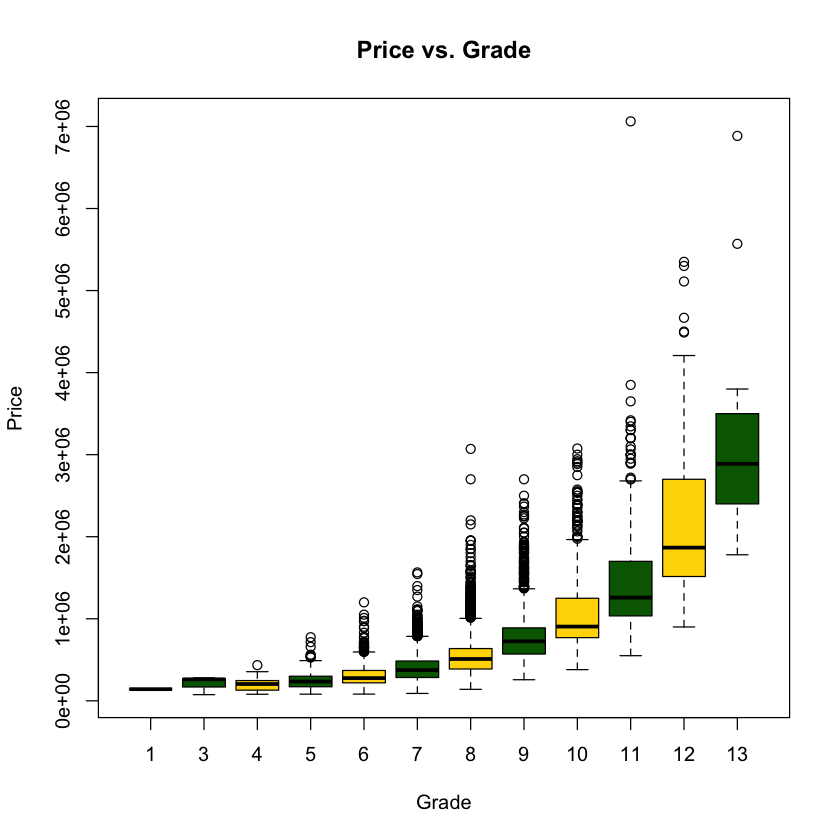

In [43]:
# boxplot 3 

## Price vs. Grade ->> Nice correlation, grade increases [median of bar plot], price increases as well
boxplot3=boxplot(price~grade, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Grade", xlab="Grade", ylab="Price")

In [44]:
# boxplot ...N

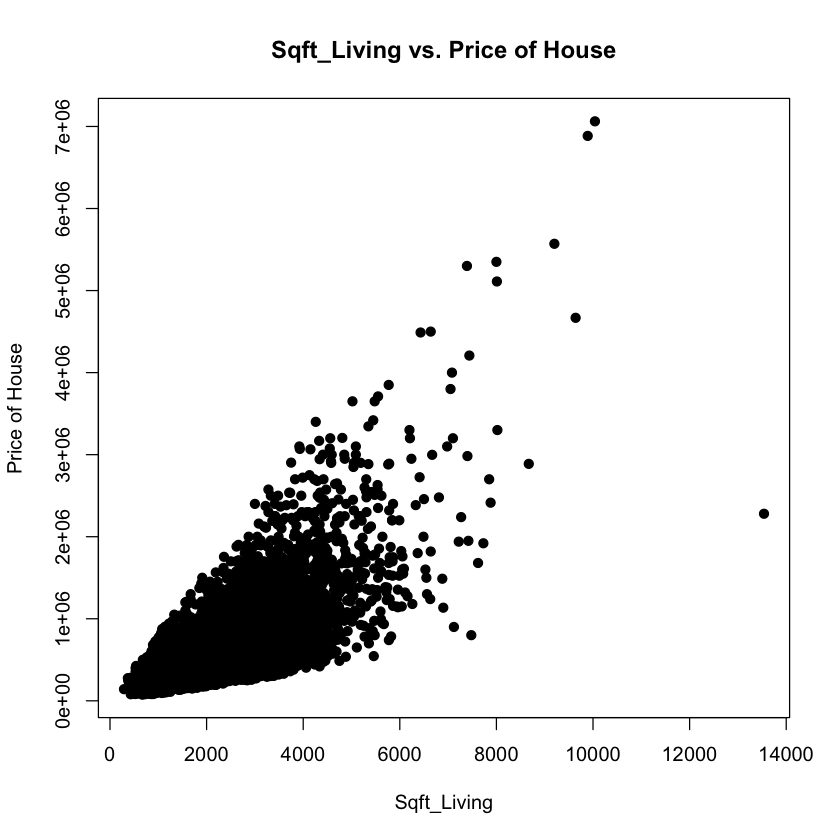

In [45]:
# scatter plot 1 

plot(Training$sqft_living,Training$price, main="Sqft_Living vs. Price of House", xlab="Sqft_Living", ylab="Price of House", pch=19)


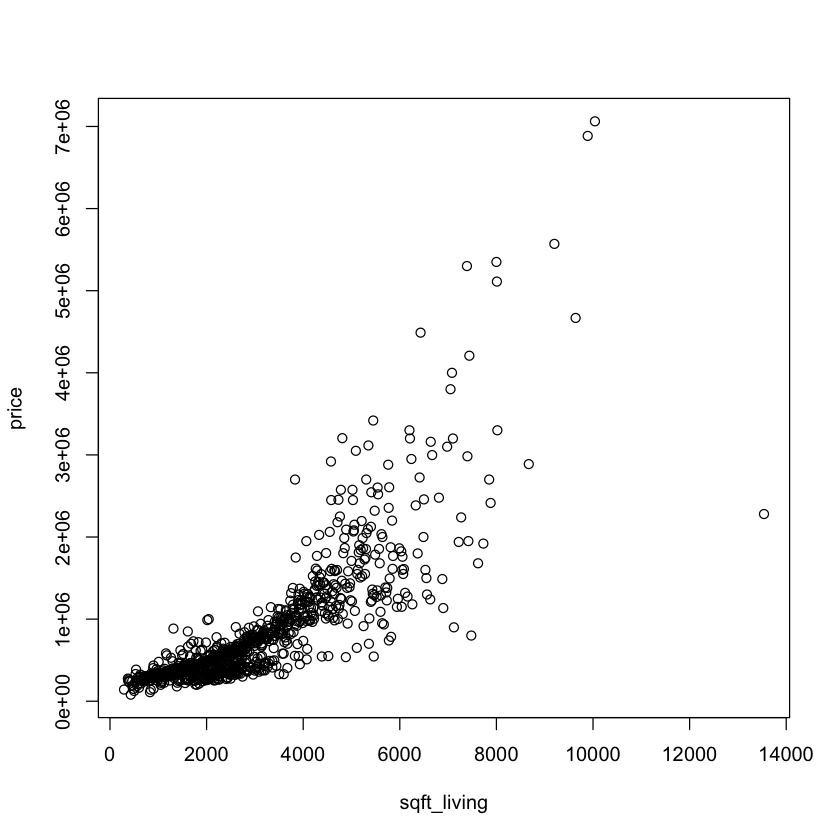

In [47]:
# # scatter plot 2 
## Since this scatterplot is too crowded - I will plot aggregated vectors to see the relationship between 2 variables. 

vec_price_sqftliving <-aggregate(price~sqft_living, FUN=mean, data=Training)
plot(vec_price_sqftliving)
scatterplot1<-recordPlot()

In [48]:
# linear model 

## Plot does not show that price and sqft_living are linearly related. It more looks like an exponential relationship. 
linear_model<-lm(vec_price_sqftliving$price~vec_price_sqftliving$sqft_living)
expo_model<-lm(log(vec_price_sqftliving$price)~vec_price_sqftliving$sqft_living)

cat("Exponential model has ", 100*(summary(expo_model)$r.squared/summary(linear_model)$r.squared-1),"% better R-squared than Linear model, thus relationship between price and sqft_living can be said to be exponential rather than linear.[expo_model R-Squared:",summary(expo_model)$r.squared," linear model R-Squared:",summary(linear_model)$r.squared,"]")



Exponential model has  14.78233 % better R-squared than Linear model, thus relationship between price and sqft_living can be said to be exponential rather than linear.[expo_model R-Squared: 0.7748747  linear model R-Squared: 0.6750818 ]